In [596]:
import torch
import math
from matplotlib import pyplot as plt
import numpy as np

In [597]:
#Data Array
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [598]:
#Weights and Bias
w2 = torch.ones(t_u.size(dim=0))
w1 = torch.ones(t_u.size(dim=0))
b = torch.zeros(t_u.size(dim=0))

In [599]:
#Model definition polynomial
def model(t_u, w2, w1, b):
    return w2*(t_u)**2 + t_u*w1 + b

In [600]:
#Loss function
def loss_func(t_p, t_c):
    var = (t_p-t_c)**2
    return var.mean()

In [601]:
t_p = model(t_u, w2, w1, b)
t_p

tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600])

In [602]:
loss = loss_func(t_p, t_c)
loss

tensor(11709471.)

In [603]:
delta = 0.1
loss_rate_of_change_b = (loss_func(model(t_u, w2, w1, b+delta), t_c) - loss_func(model(t_u, w2, w1, b-delta), t_c))/(2.0 * delta)
loss_rate_of_change_w1 = (loss_func(model(t_u, w2, w1+delta, b), t_c) - loss_func(model(t_u, w2, w1-delta, b), t_c))/(2.0 * delta)
loss_rate_of_change_w2 = (loss_func(model(t_u, w2+delta, w1 ,b), t_c) - loss_func(model(t_u, w2-delta, w1, b), t_c))/(2.0 * delta)

In [604]:
print(loss_rate_of_change_b)
print(loss_rate_of_change_w1)
print(loss_rate_of_change_w2)

tensor(5965.)
tensor(361810.)
tensor(23148730.)


In [605]:
#learning_rate = 0.01
w1 = w1 - learning_rate * loss_rate_of_change_w1
w2 = w2 - learning_rate * loss_rate_of_change_w2
b = b - learning_rate * loss_rate_of_change_b

In [606]:
print(b)
print(w1)
print(w2)

tensor([-59.6500, -59.6500, -59.6500, -59.6500, -59.6500, -59.6500, -59.6500,
        -59.6500, -59.6500, -59.6500, -59.6500])
tensor([-3617.0999, -3617.0999, -3617.0999, -3617.0999, -3617.0999, -3617.0999,
        -3617.0999, -3617.0999, -3617.0999, -3617.0999, -3617.0999])
tensor([-231486.2969, -231486.2969, -231486.2969, -231486.2969, -231486.2969,
        -231486.2969, -231486.2969, -231486.2969, -231486.2969, -231486.2969,
        -231486.2969])


In [607]:
#Partial deriv of loss function 
def dloss_fn(t_p, t_c):
    dsq_diffs=2* (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [608]:
#dm/dw2
def dmodel_dw2(t_u, w2, w1, b):
    return t_u**2

In [609]:
#dm/dw1
def dmodel_dw1(t_u, w2, w1, b):
    return t_u

In [610]:
#dm/db
def dmodel_db(t_u, w2, w1, b):
    return 1.0

In [611]:
def grad_fn(t_u, t_c, t_p, w2, w1, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w2, w1, b)
    dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w2, w1, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w2, w1, b)
    return torch.stack([dloss_dw2.sum(), dloss_dw1.sum(), dloss_db.sum()])


In [612]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w2, w1, b = params
        t_p = model(t_u, w2, w1, b)
        loss = loss_func(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w2, w1, b)
        params = params - learning_rate * grad
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
        print('Params: %f', params)
        print("Grad: %f", grad)
        print('-------------------------------------------------')
    return params

In [615]:
#In this part I was getting na numbers...I HAD to reduce the learning rate to that level......
#rest of the training for LR=0.1,0.01,0.001,0.0001 is done in the following sub-parts of the HW like Problem 1.1,1.2,etc.

t_un = 0.1 * t_u
training_loop(
n_epochs = 500,
learning_rate = 1e-4,
params = torch.tensor([1, 1, 0]),
t_u = t_un,
t_c = t_c)

Epoch 1, Loss 675.794373
Params: %f tensor([ 0.8260,  0.9720, -0.0048])
Grad: %f tensor([1739.5315,  279.6790,   48.1760])
-------------------------------------------------
Epoch 2, Loss 401.575317
Params: %f tensor([ 0.6929,  0.9504, -0.0086])
Grad: %f tensor([1331.2151,  215.8319,   37.6454])
-------------------------------------------------
Epoch 3, Loss 240.907486
Params: %f tensor([ 0.5911,  0.9338, -0.0115])
Grad: %f tensor([1018.6732,  166.9600,   29.5846])
-------------------------------------------------
Epoch 4, Loss 146.769318
Params: %f tensor([ 0.5131,  0.9208, -0.0139])
Grad: %f tensor([779.4408, 129.5509,  23.4142])
-------------------------------------------------
Epoch 5, Loss 91.610870
Params: %f tensor([ 0.4535,  0.9107, -0.0158])
Grad: %f tensor([596.3224, 100.9158,  18.6910])
-------------------------------------------------
Epoch 6, Loss 59.290676
Params: %f tensor([ 0.4079,  0.9028, -0.0173])
Grad: %f tensor([456.1562,  78.9967,  15.0754])
-----------------------

Epoch 68, Loss 13.156970
Params: %f tensor([ 0.2663,  0.8336, -0.0412])
Grad: %f tensor([-1.2271,  7.3176,  3.2167])
-------------------------------------------------
Epoch 69, Loss 13.150428
Params: %f tensor([ 0.2664,  0.8329, -0.0416])
Grad: %f tensor([-1.2267,  7.3151,  3.2157])
-------------------------------------------------
Epoch 70, Loss 13.143893
Params: %f tensor([ 0.2665,  0.8322, -0.0419])
Grad: %f tensor([-1.2263,  7.3126,  3.2147])
-------------------------------------------------
Epoch 71, Loss 13.137362
Params: %f tensor([ 0.2667,  0.8314, -0.0422])
Grad: %f tensor([-1.2258,  7.3100,  3.2137])
-------------------------------------------------
Epoch 72, Loss 13.130840
Params: %f tensor([ 0.2668,  0.8307, -0.0425])
Grad: %f tensor([-1.2254,  7.3075,  3.2127])
-------------------------------------------------
Epoch 73, Loss 13.124317
Params: %f tensor([ 0.2669,  0.8300, -0.0429])
Grad: %f tensor([-1.2250,  7.3050,  3.2117])
------------------------------------------------

Params: %f tensor([ 0.2741,  0.7873, -0.0616])
Grad: %f tensor([-1.2005,  7.1576,  3.1530])
-------------------------------------------------
Epoch 133, Loss 12.741058
Params: %f tensor([ 0.2742,  0.7866, -0.0619])
Grad: %f tensor([-1.2001,  7.1551,  3.1520])
-------------------------------------------------
Epoch 134, Loss 12.734802
Params: %f tensor([ 0.2743,  0.7859, -0.0623])
Grad: %f tensor([-1.1996,  7.1527,  3.1510])
-------------------------------------------------
Epoch 135, Loss 12.728552
Params: %f tensor([ 0.2744,  0.7852, -0.0626])
Grad: %f tensor([-1.1992,  7.1502,  3.1500])
-------------------------------------------------
Epoch 136, Loss 12.722302
Params: %f tensor([ 0.2745,  0.7844, -0.0629])
Grad: %f tensor([-1.1988,  7.1477,  3.1490])
-------------------------------------------------
Epoch 137, Loss 12.716059
Params: %f tensor([ 0.2747,  0.7837, -0.0632])
Grad: %f tensor([-1.1984,  7.1452,  3.1480])
-------------------------------------------------
Epoch 138, Loss 12

Params: %f tensor([ 0.2826,  0.7364, -0.0841])
Grad: %f tensor([-1.1712,  6.9817,  3.0829])
-------------------------------------------------
Epoch 205, Loss 12.301330
Params: %f tensor([ 0.2827,  0.7357, -0.0844])
Grad: %f tensor([-1.1707,  6.9793,  3.0819])
-------------------------------------------------
Epoch 206, Loss 12.295374
Params: %f tensor([ 0.2828,  0.7350, -0.0847])
Grad: %f tensor([-1.1703,  6.9769,  3.0809])
-------------------------------------------------
Epoch 207, Loss 12.289417
Params: %f tensor([ 0.2829,  0.7343, -0.0850])
Grad: %f tensor([-1.1699,  6.9745,  3.0800])
-------------------------------------------------
Epoch 208, Loss 12.283472
Params: %f tensor([ 0.2831,  0.7336, -0.0853])
Grad: %f tensor([-1.1695,  6.9721,  3.0790])
-------------------------------------------------
Epoch 209, Loss 12.277527
Params: %f tensor([ 0.2832,  0.7329, -0.0856])
Grad: %f tensor([-1.1691,  6.9697,  3.0781])
-------------------------------------------------
Epoch 210, Loss 12

Params: %f tensor([ 0.2894,  0.6956, -0.1021])
Grad: %f tensor([-1.1477,  6.8408,  3.0267])
-------------------------------------------------
Epoch 264, Loss 11.956708
Params: %f tensor([ 0.2895,  0.6950, -0.1024])
Grad: %f tensor([-1.1473,  6.8384,  3.0258])
-------------------------------------------------
Epoch 265, Loss 11.950983
Params: %f tensor([ 0.2897,  0.6943, -0.1027])
Grad: %f tensor([-1.1468,  6.8360,  3.0248])
-------------------------------------------------
Epoch 266, Loss 11.945268
Params: %f tensor([ 0.2898,  0.6936, -0.1030])
Grad: %f tensor([-1.1465,  6.8337,  3.0239])
-------------------------------------------------
Epoch 267, Loss 11.939554
Params: %f tensor([ 0.2899,  0.6929, -0.1033])
Grad: %f tensor([-1.1461,  6.8313,  3.0229])
-------------------------------------------------
Epoch 268, Loss 11.933841
Params: %f tensor([ 0.2900,  0.6922, -0.1036])
Grad: %f tensor([-1.1457,  6.8290,  3.0220])
-------------------------------------------------
Epoch 269, Loss 11

Grad: %f tensor([-1.1235,  6.6957,  2.9689])
-------------------------------------------------
Epoch 326, Loss 11.609172
Params: %f tensor([ 0.2966,  0.6530, -0.1210])
Grad: %f tensor([-1.1231,  6.6934,  2.9680])
-------------------------------------------------
Epoch 327, Loss 11.603683
Params: %f tensor([ 0.2967,  0.6524, -0.1213])
Grad: %f tensor([-1.1227,  6.6910,  2.9670])
-------------------------------------------------
Epoch 328, Loss 11.598203
Params: %f tensor([ 0.2968,  0.6517, -0.1216])
Grad: %f tensor([-1.1223,  6.6887,  2.9661])
-------------------------------------------------
Epoch 329, Loss 11.592722
Params: %f tensor([ 0.2969,  0.6510, -0.1219])
Grad: %f tensor([-1.1219,  6.6864,  2.9652])
-------------------------------------------------
Epoch 330, Loss 11.587249
Params: %f tensor([ 0.2970,  0.6503, -0.1222])
Grad: %f tensor([-1.1215,  6.6841,  2.9643])
-------------------------------------------------
Epoch 331, Loss 11.581776
Params: %f tensor([ 0.2971,  0.6497, -0

Params: %f tensor([ 0.3030,  0.6146, -0.1380])
Grad: %f tensor([-1.1010,  6.5604,  2.9150])
-------------------------------------------------
Epoch 385, Loss 11.291789
Params: %f tensor([ 0.3031,  0.6139, -0.1383])
Grad: %f tensor([-1.1006,  6.5581,  2.9141])
-------------------------------------------------
Epoch 386, Loss 11.286517
Params: %f tensor([ 0.3032,  0.6133, -0.1386])
Grad: %f tensor([-1.1003,  6.5559,  2.9132])
-------------------------------------------------
Epoch 387, Loss 11.281251
Params: %f tensor([ 0.3034,  0.6126, -0.1389])
Grad: %f tensor([-1.0999,  6.5536,  2.9123])
-------------------------------------------------
Epoch 388, Loss 11.275986
Params: %f tensor([ 0.3035,  0.6120, -0.1392])
Grad: %f tensor([-1.0994,  6.5513,  2.9114])
-------------------------------------------------
Epoch 389, Loss 11.270728
Params: %f tensor([ 0.3036,  0.6113, -0.1395])
Grad: %f tensor([-1.0991,  6.5491,  2.9105])
-------------------------------------------------
Epoch 390, Loss 11

Epoch 450, Loss 10.956562
Params: %f tensor([ 0.3102,  0.5718, -0.1571])
Grad: %f tensor([-1.0763,  6.4123,  2.8560])
-------------------------------------------------
Epoch 451, Loss 10.951520
Params: %f tensor([ 0.3103,  0.5712, -0.1573])
Grad: %f tensor([-1.0760,  6.4101,  2.8551])
-------------------------------------------------
Epoch 452, Loss 10.946480
Params: %f tensor([ 0.3104,  0.5705, -0.1576])
Grad: %f tensor([-1.0756,  6.4079,  2.8542])
-------------------------------------------------
Epoch 453, Loss 10.941445
Params: %f tensor([ 0.3105,  0.5699, -0.1579])
Grad: %f tensor([-1.0752,  6.4056,  2.8533])
-------------------------------------------------
Epoch 454, Loss 10.936414
Params: %f tensor([ 0.3106,  0.5692, -0.1582])
Grad: %f tensor([-1.0748,  6.4034,  2.8524])
-------------------------------------------------
Epoch 455, Loss 10.931384
Params: %f tensor([ 0.3107,  0.5686, -0.1585])
Grad: %f tensor([-1.0745,  6.4012,  2.8516])
------------------------------------------

tensor([ 0.3155,  0.5400, -0.1712])

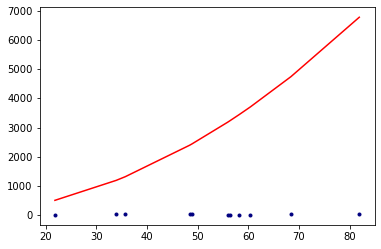

In [614]:
plt.plot(np.sort(t_u.numpy()), t_c.numpy(), '.', color = "navy");
plt.plot(np.sort(t_u.numpy()), np.sort(t_p.detach().numpy()), color = "r")